In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import datasets
data=pd.read_csv('C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Plot Selling(train).csv')
test_read=pd.read_csv('C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Plot Selling(test).csv')

In [3]:
#to get some knowledge of our data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#to get knowledge how many entries we get
data.shape

(1460, 81)

In [6]:
data.set_index('Id' , inplace=True)
test_read.set_index('Id' , inplace = True)

In [7]:
# Total counts null values in input
# We are sorting values so that we can see cols that have max missing data in it first
# And sort it in descending order
total = data.isnull().sum().sort_values(ascending=False)
# percentage = null / all enetries
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [8]:
# From above code we can see in some cols (no. of missing data > no. of filled data)
# So , clearly that data has less connection to selling price 
# That's why we can remove it
# I will drop data that missing value around 50%
data = data.drop(['PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' , 'FireplaceQu' , 'LotFrontage'] , axis = 1)
# Remove the same cols from Test data also
test_read = test_read.drop(['PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' , 'FireplaceQu' , 'LotFrontage'] , axis = 1)

In [9]:
# Here we can see 5 cols have been dropped
data.shape

(1460, 74)

In [10]:
# To display all 75 cols
pd.set_option('display.max_columns',75)
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
# Now in this new data we have less missing datas compared to before
# However we must fill missing data by some values
data['GarageCond'].fillna('None', inplace=True)
data['GarageType'].fillna('None', inplace=True)
# Look for how to fill data of year built in garage year built in empty place
data['GarageYrBlt'].fillna(0.0 , inplace=True)
data['GarageFinish'].fillna('None' , inplace=True)
data['GarageQual'].fillna('None', inplace=True)

data['BsmtExposure'].fillna('None', inplace=True)
data['BsmtFinType2'].fillna('None' , inplace=True)
data['BsmtFinType1'].fillna('None', inplace=True)
data['BsmtCond'].fillna('None' , inplace=True)
data['BsmtQual'].fillna('None', inplace=True)

data['MasVnrArea'].fillna(0.0, inplace=True)
data['MasVnrType'].fillna('None', inplace=True)

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
# percentage = null / all enetries
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000


In [13]:
# Drop that data in which there is no electricity
data.dropna(inplace=True)

In [14]:
test_read['GarageCond'].fillna('None', inplace=True)
test_read['GarageQual'].fillna('None', inplace=True)
test_read['GarageYrBlt'].fillna(0.0 , inplace=True)
test_read['GarageFinish'].fillna('None' , inplace=True)
test_read['GarageType'].fillna('None', inplace=True)

test_read['BsmtCond'].fillna('None', inplace=True)
test_read['BsmtQual'].fillna('None' , inplace=True)
test_read['BsmtExposure'].fillna('None' , inplace=True)
test_read['BsmtFinType1'].fillna('None', inplace=True)
test_read['BsmtFinType2'].fillna('None', inplace=True)

test_read['MasVnrType'].fillna('None', inplace=True)
test_read['MasVnrArea'].fillna(0.0, inplace=True)

test_read['MSZoning'].fillna('None' , inplace=True)

test_read['BsmtHalfBath'].fillna(0 , inplace=True)
test_read['BsmtFullBath'].fillna(0 , inplace=True)
test_read['BsmtUnfSF'].fillna(0, inplace=True)
test_read['BsmtFinSF1'].fillna(0, inplace=True)
test_read['BsmtFinSF2'].fillna(0, inplace=True)

# Deal with this empty data afterwords
# test_read['SaleType'].fillna(test_read['SaleType'].mode()[0], inplace=True)
# test_read['Utilities'].fillna(test_read['Utilities'].mode()[0], inplace=True)
# test_read['Functional'].fillna(test_read['Functional'].mode()[0], inplace=True)
# test_read['Exterior1st'].fillna(test_read['Exterior1st'].mode()[0], inplace=True)
# test_read['Exterior2nd'].fillna(test_read['Exterior2nd'].mode()[0], inplace=True)
# test_read['TotalBsmtSF'].fillna(test_read['TotalBsmtSF'].mean(), inplace=True)
# test_read['GarageCars'].fillna(test_read['GarageCars'].mean(), inplace=True)
# test_read['KitchenQual'].fillna(test_read['KitchenQual'].mode()[0], inplace=True)
# test_read['GarageArea'].fillna(test_read['GarageArea'].mean(), inplace=True)

In [15]:
total = test_read.isnull().sum().sort_values(ascending=False)
percent = (test_read.isnull().sum()/test_read.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Functional,2,0.001371
Utilities,2,0.001371
TotalBsmtSF,1,0.000685
SaleType,1,0.000685
Exterior1st,1,0.000685
Exterior2nd,1,0.000685
GarageCars,1,0.000685
KitchenQual,1,0.000685
GarageArea,1,0.000685
MasVnrType,0,0.000000


In [16]:
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
test_read['GarageYrBlt'] = test_read['GarageYrBlt'].astype(int)

###Converting object data into Integer

In [17]:
cat_col=[col for col in data.columns if data[col].dtype=='O']
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [18]:
categorical = data[cat_col]
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [19]:
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

MSZoning has total 5 categories 

Street has total 2 categories 

LotShape has total 4 categories 

LandContour has total 4 categories 

Utilities has total 2 categories 

LotConfig has total 5 categories 

LandSlope has total 3 categories 

Neighborhood has total 25 categories 

Condition1 has total 9 categories 

Condition2 has total 8 categories 

BldgType has total 5 categories 

HouseStyle has total 8 categories 

RoofStyle has total 6 categories 

RoofMatl has total 8 categories 

Exterior1st has total 15 categories 

Exterior2nd has total 16 categories 

MasVnrType has total 4 categories 

ExterQual has total 4 categories 

ExterCond has total 5 categories 

Foundation has total 6 categories 

BsmtQual has total 5 categories 

BsmtCond has total 5 categories 

BsmtExposure has total 5 categories 

BsmtFinType1 has total 7 categories 

BsmtFinType2 has total 7 categories 

Heating has total 6 categories 

HeatingQC has total 5 categories 

CentralAir has total 2 categories 

Elec

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cat_col:
    categorical[i]=encoder.fit_transform(categorical[i])

In [21]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4
2,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,1,2,5,5,2,8,4
3,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4
4,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,5,3,5,5,2,8,0
5,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4


In [22]:
data.drop(cat_col , axis = 1,inplace = True)

In [23]:
data_train=pd.concat([categorical,data],axis=1)
data_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500
2,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,1,2,5,5,2,8,4,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500
3,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500
4,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,5,3,5,5,2,8,0,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000
5,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,1,2,5,5,2,8,4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000


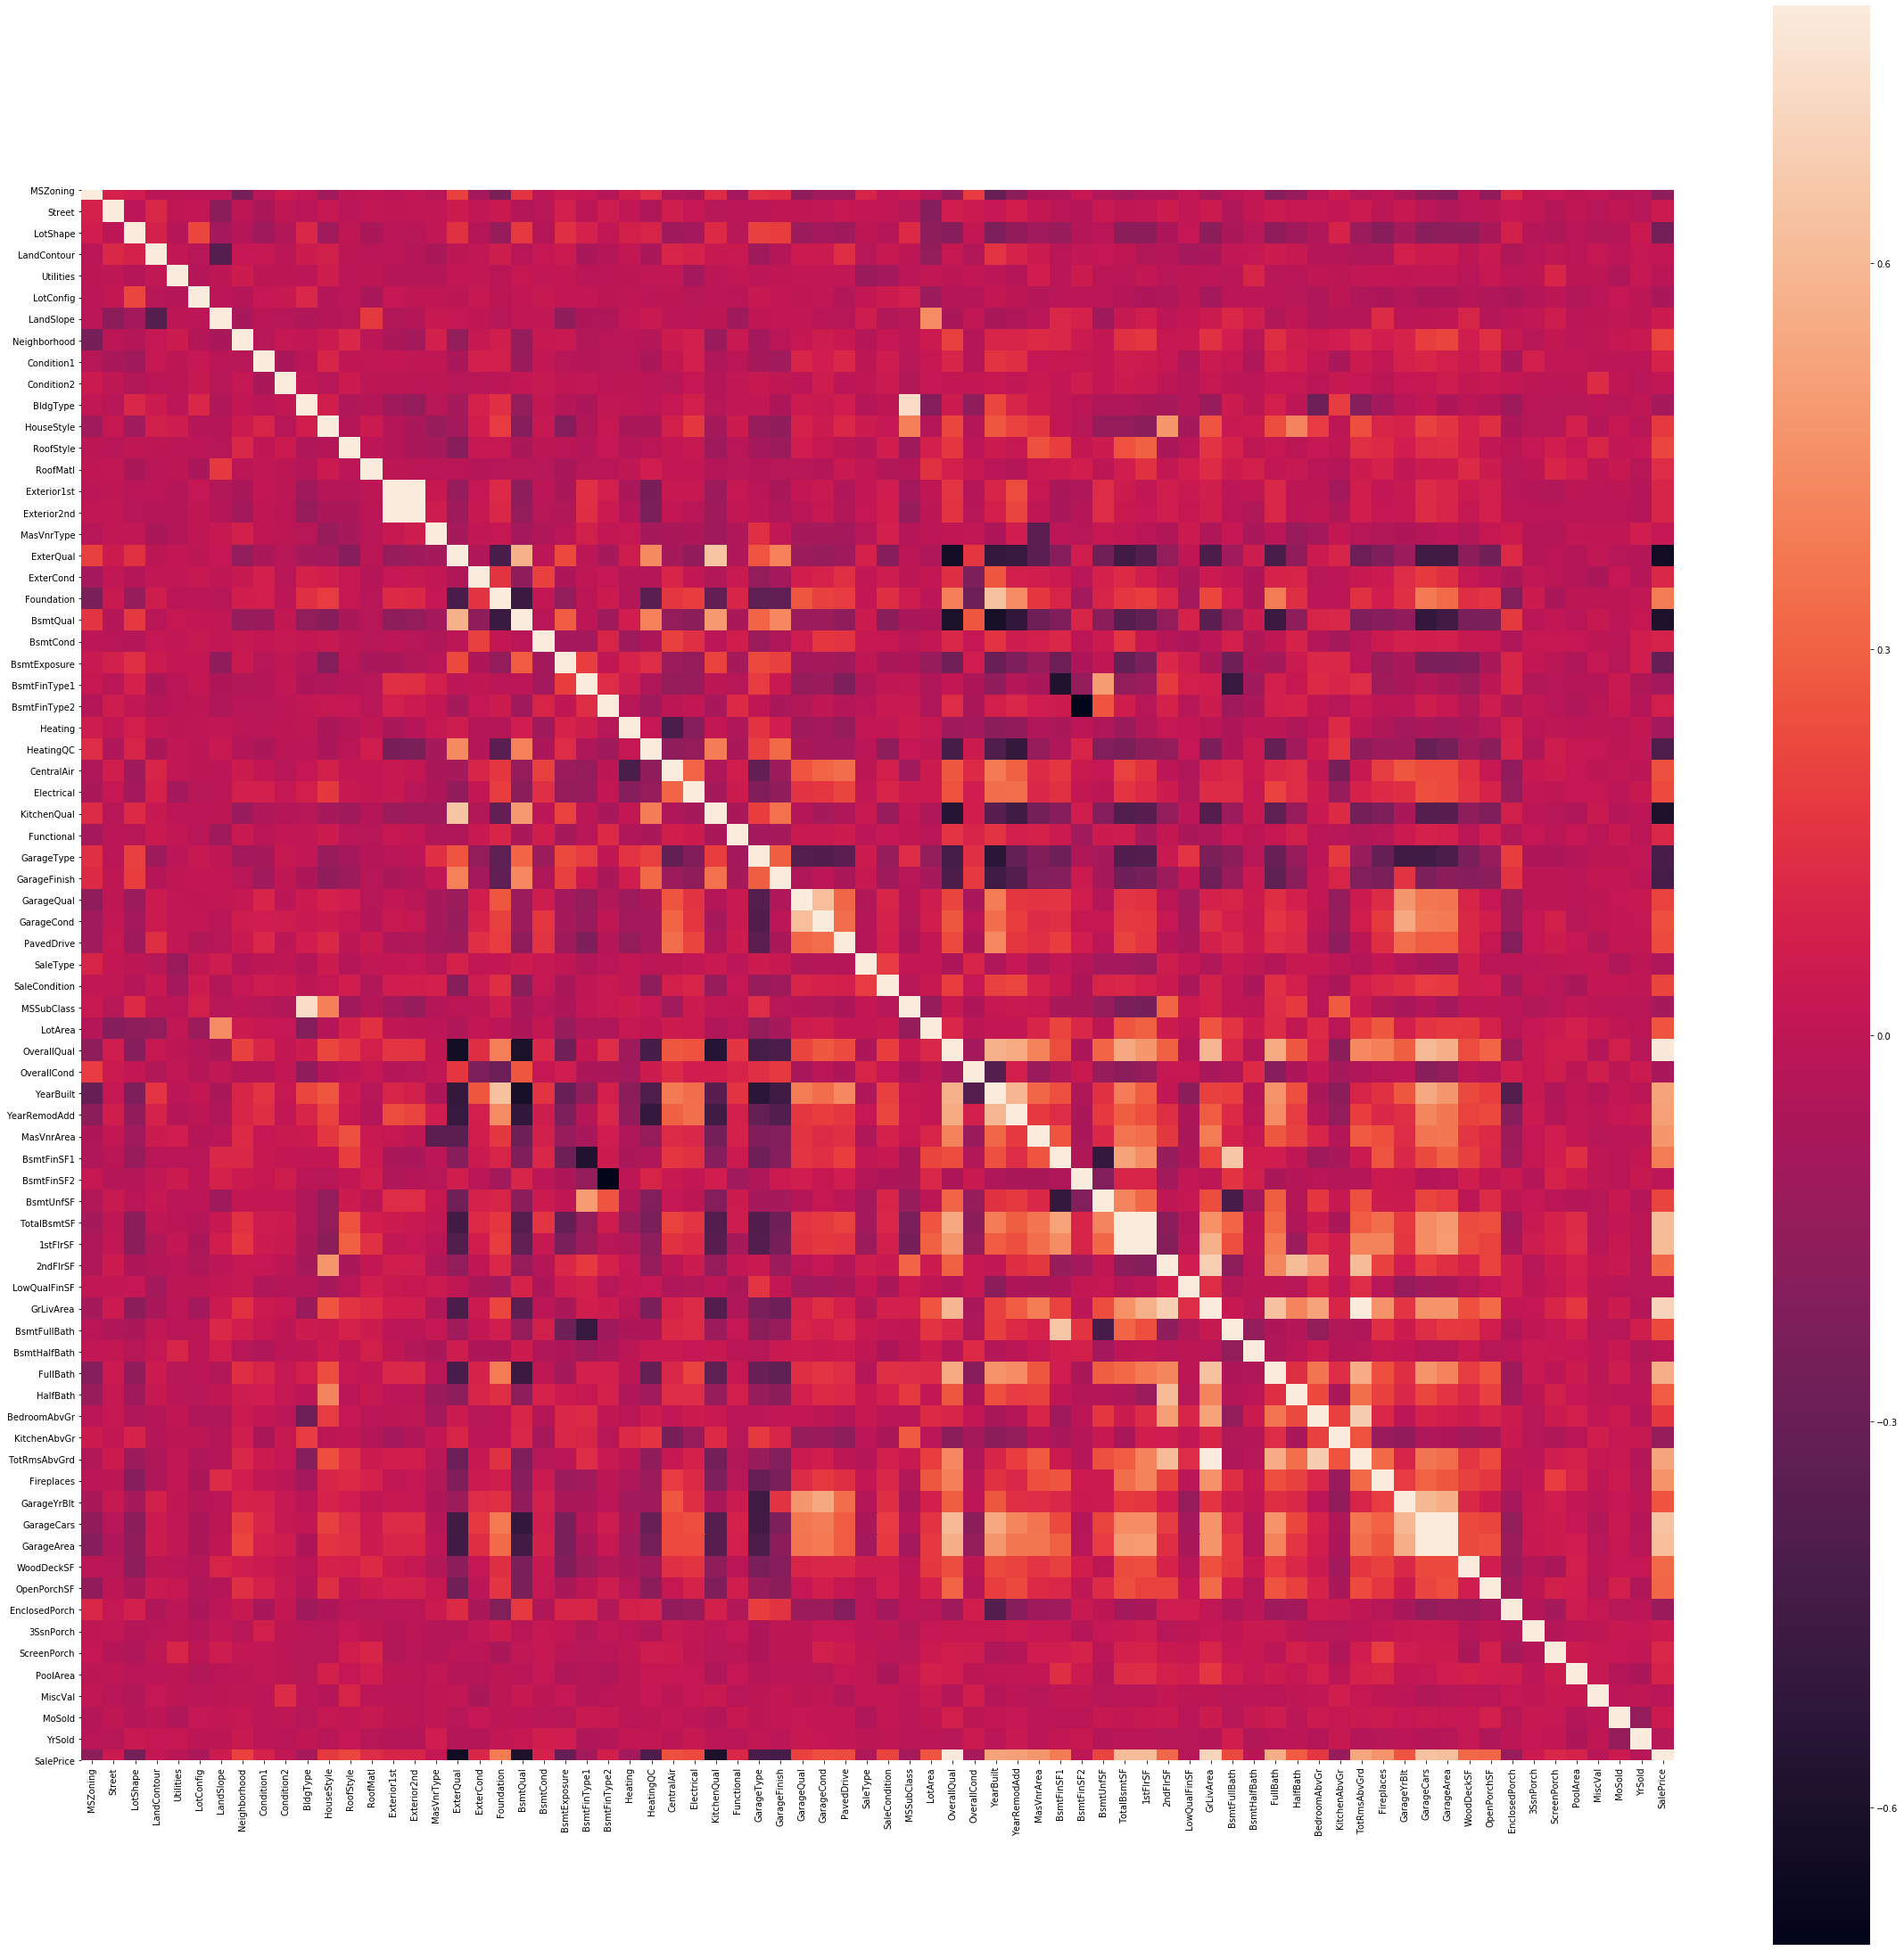

In [24]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(40 , 40))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
# All data is of integer type
# drop columns that are strongly connected to column other than SalePrice
drop = ['LotShape' , 'ExterQual' , 'MSZoning' , 'BsmtQual' , 'BsmtExposure' , 'HeatingQC' , 'KitchenQual' , 
       'GarageType' , 'GarageFinish' , 'LotConfig' , 'Exterior1st' , 'GarageQual' , 'BldgType' , 'MasVnrType' , 
       'BsmtFinType1' , 'Heating' , 'SaleType' , 'MSSubClass' , 'OverallCond' , 'LowQualFinSF' , 'BsmtHalfBath' , 
       'KitchenAbvGr' , 'EnclosedPorch']
data_train.drop(drop , axis = 1 , inplace = True)
test_read.drop(drop , axis = 1 , inplace = True)

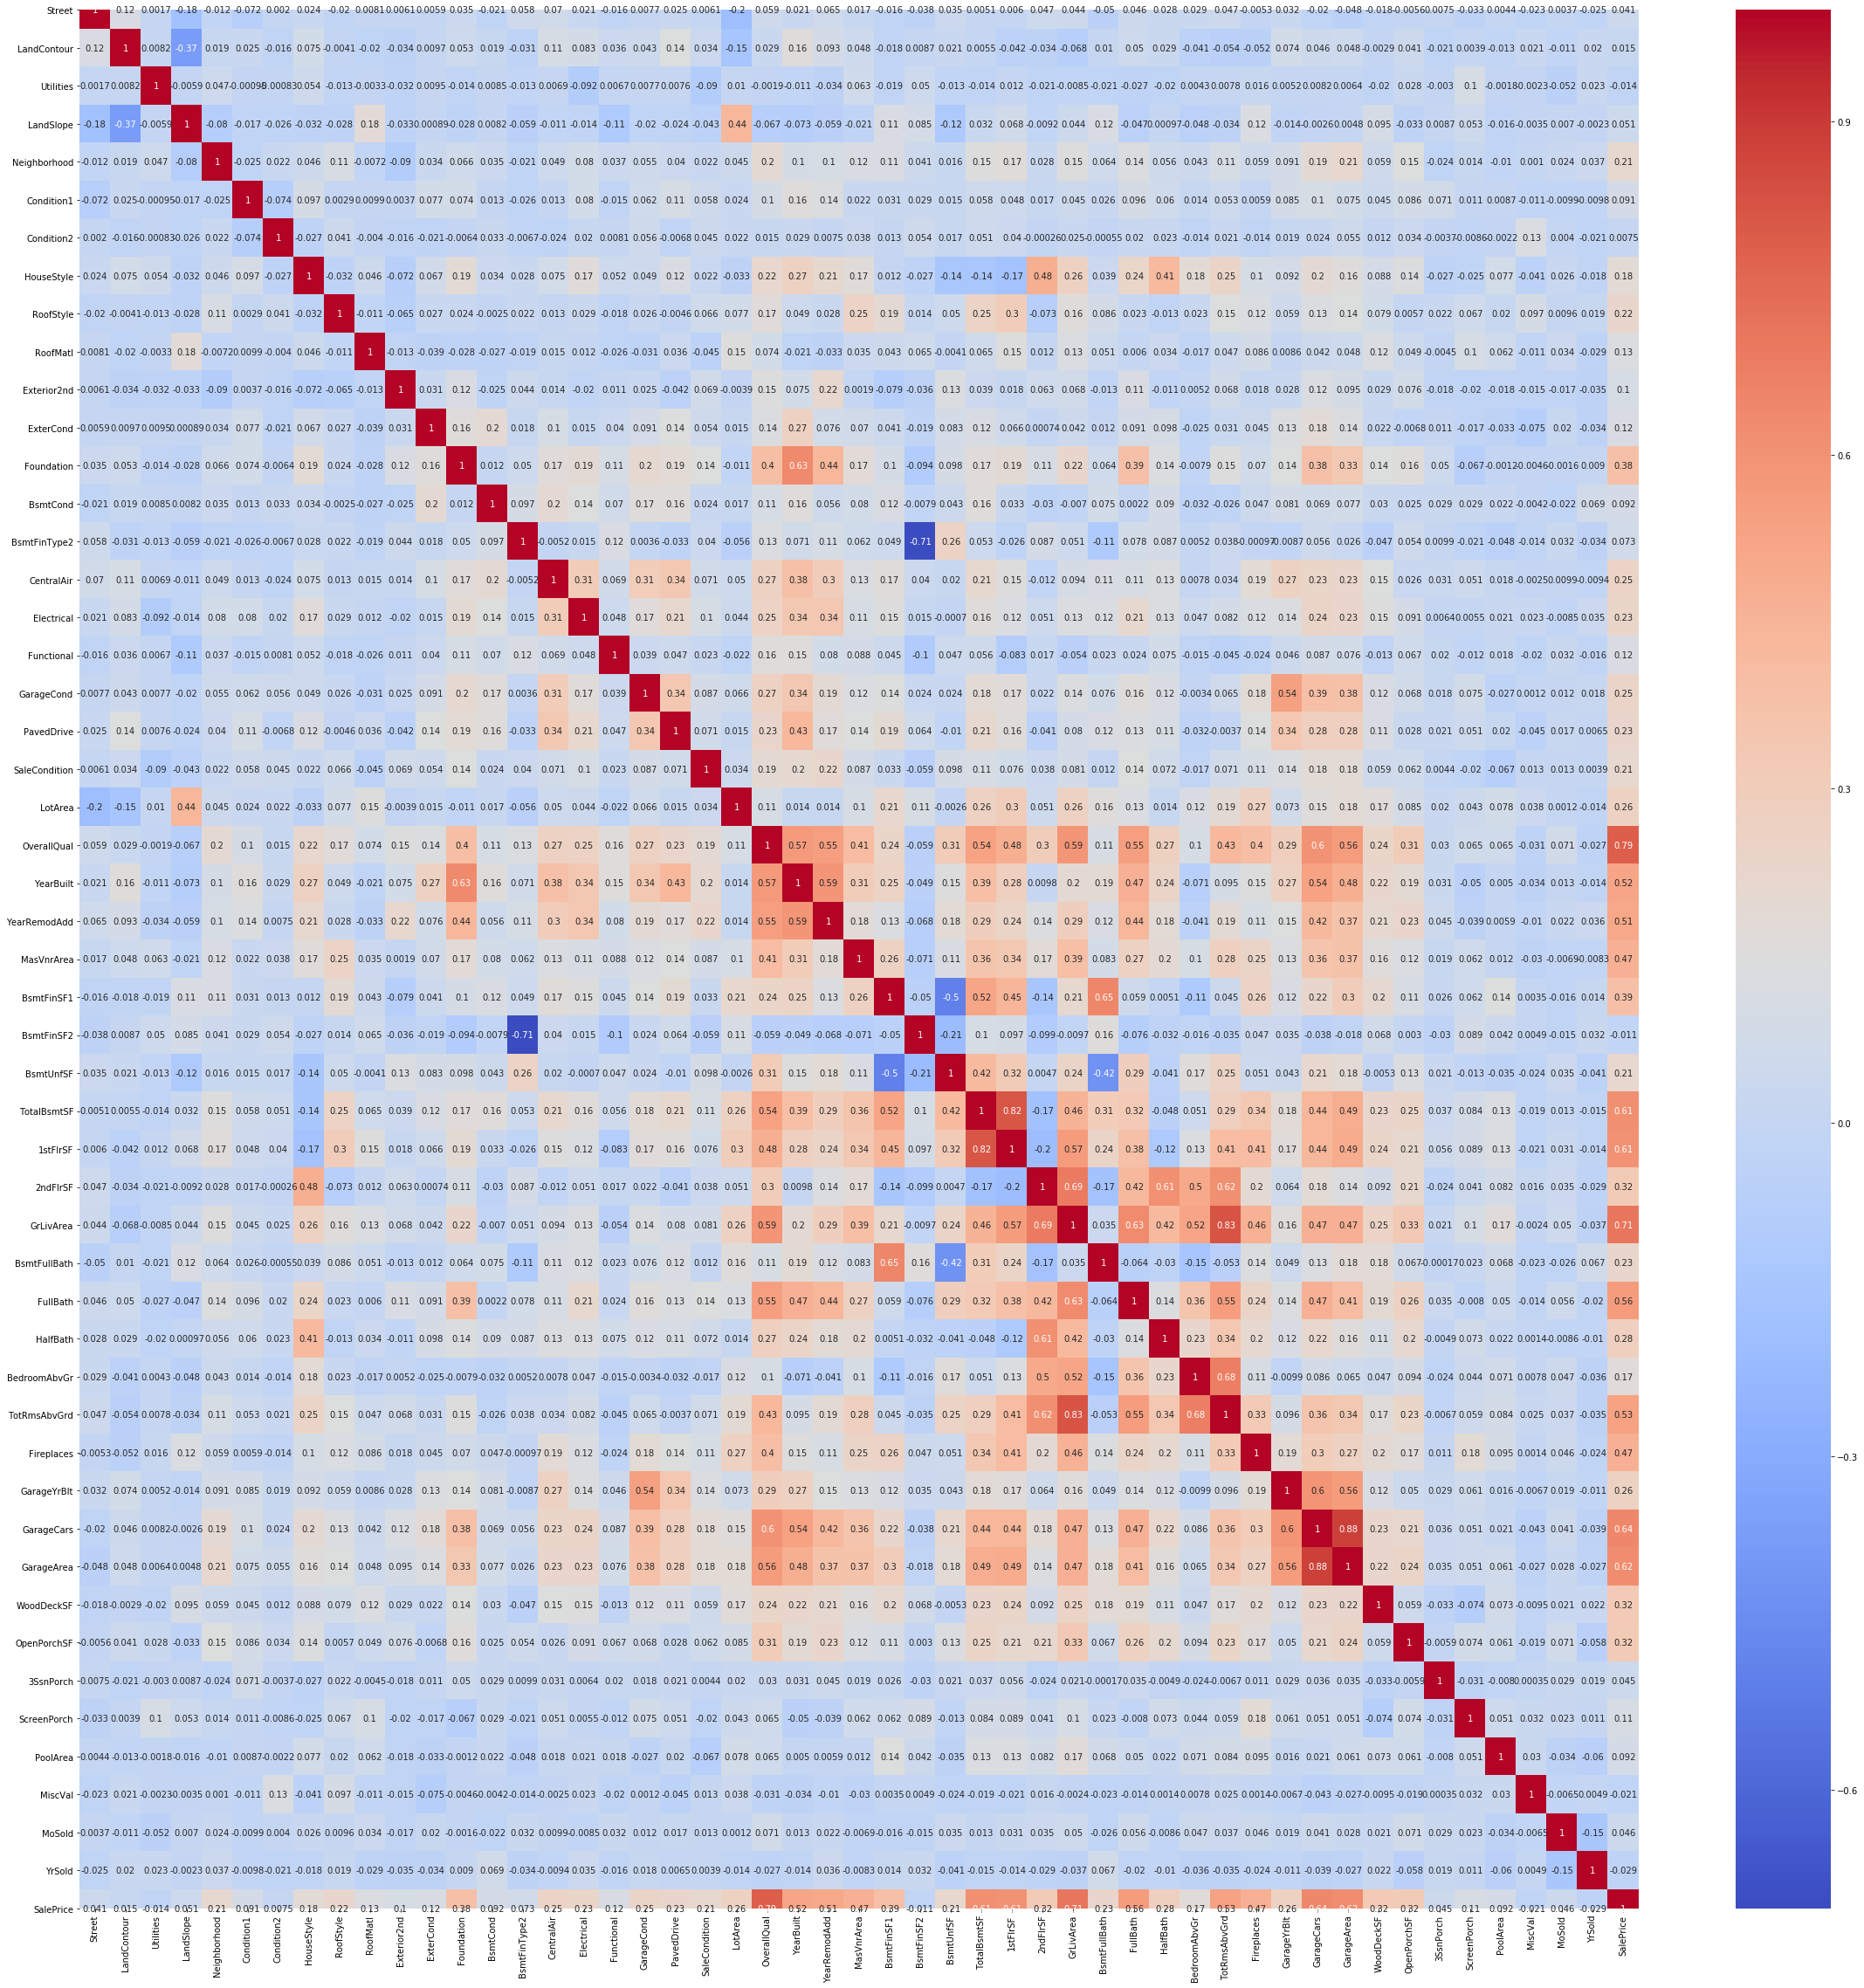

In [26]:
corr = data_train.corr()
fig , ax = plt.subplots(figsize = (40 , 40))
sns.heatmap(corr , annot = True , ax = ax , cmap = 'coolwarm')

In [27]:
drop = ['BsmtFinSF2' , 'Condition2' , 'Utilities' , 'YrSold' , 'MiscVal' , 'Street' , 'LandContour' , 'LandSlope' , 
       'Condition1' , 'Exterior2nd' , 'BsmtCond' , 'HouseStyle' , 'RoofMatl' , 'ExterCond' , 'BsmtCond' , 
       'BsmtFinType2' , 'Functional' , 'BedroomAbvGr' , '3SsnPorch' , 'ScreenPorch' , 'PoolArea', 'MiscVal' , 
        'MoSold' , 'Neighborhood' ,  'RoofStyle' , 'CentralAir' , 'Electrical' , 'GarageCond' , 
       'PavedDrive' , 'SaleCondition' , 'LotArea' , 'BsmtUnfSF' , 'BsmtFullBath' , 'HalfBath' , 'GarageYrBlt']
data_train.drop(drop , axis = 1 , inplace = True)
test_read.drop(drop , axis = 1 , inplace = True)

In [28]:
data_train.shape

(1459, 18)

In [29]:
### Outlier Detection

<Figure size 2160x1440 with 0 Axes>

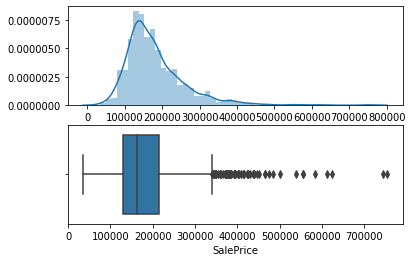

In [30]:
# 
plt.figure(figsize=(30,20))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(data_train['SalePrice'],ax=ax1)
sns.boxplot(data_train['SalePrice'],ax=ax2)

In [31]:
data_train['SalePrice']=np.where(data_train['SalePrice']>=500000,data_train['SalePrice'].median(),data_train['SalePrice'])

<Figure size 2160x1440 with 0 Axes>

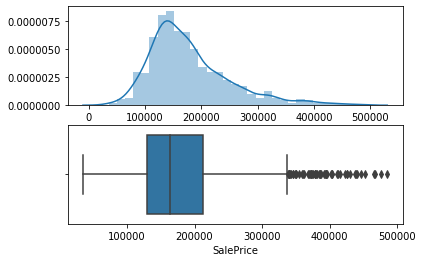

In [32]:
plt.figure(figsize=(30,20))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(data_train['SalePrice'],ax=ax1)
sns.boxplot(data_train['SalePrice'],ax=ax2)

In [33]:
from sklearn.model_selection import train_test_split
x = data.drop(['SalePrice'] , axis = 1)
y = data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=11)

-----------------------------------------------------Random Forest-------------------------------------------------------------

In [34]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)

Training score : 0.9730417502915409
r2 score: 0.8711034359286656
RMSE: 28530.45717041504


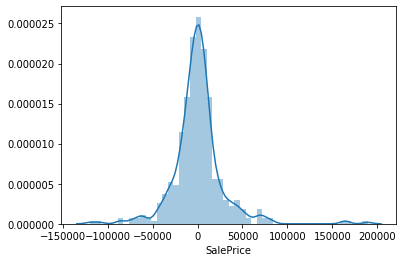

In [35]:
from sklearn import metrics
print('Training score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
r2_score=metrics.r2_score(y_test,y_pred)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)
# import pickle
# file = open(location) -> give location where you want to dump model
# pickle.dump(model , file)

---------------------------------------------------Linear Regression-----------------------------------------------------------

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

Training score : 0.8147279158090142
r2 score: 0.8074555693128374
RMSE: 34870.12796019249


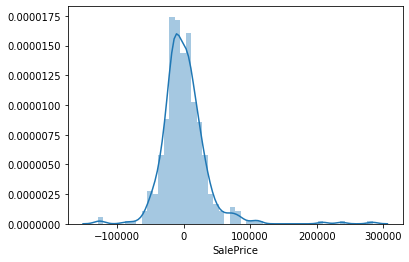

In [37]:
print('Training score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
r2_score=metrics.r2_score(y_test,y_pred)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

-------------------------------------------------KNeighbour Regression---------------------------------------------------------

In [38]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train,y_train)

Training score : 0.7801401531704444
r2 score: 0.6359342949740474
RMSE: 47948.822404991224


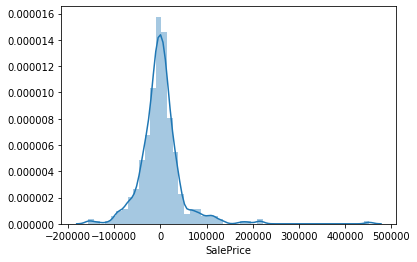

In [39]:
print('Training score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
r2_score=metrics.r2_score(y_test,y_pred)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

--------------------------------------------------Decision Tree----------------------------------------------------------------

In [40]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train,y_train)

Training score : 0.9999946480436291
r2 score: 0.7892311543267101
RMSE: 36483.060967889716


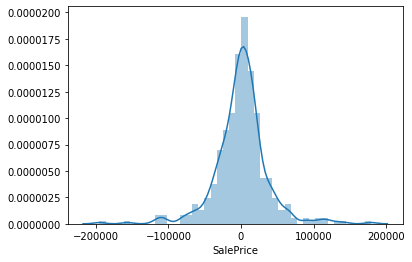

In [41]:
print('Training score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
r2_score=metrics.r2_score(y_test,y_pred)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

-----------------------------------------------------Performance Booster-------------------------------------------------------

In [42]:
# This part of code is to increase performance of 
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestRegressor()

In [43]:
# list comprehension
# linspace function is used to generate evenly spaced number in given range
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 6)]
max_depth = [int(x) for x in np.linspace(start = 5 , stop = 30 , num = 4)]

In [44]:
# To find best parameter value for random forest algo make dictionary that has all parameters that need to be updated
random_grid = {
    # no of trees in tech
    'n_estimators': n_estimators , 
    # max. number of split need to consider at each node
    'max_features': ['auto' , 'sqrt'] ,
    # max. depth of tree
    'max_depth': max_depth , 
    # min number of split required to split a node
    'min_samples_split': [5 , 10 , 15 , 100]
}

In [45]:
print(random_grid)

{'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 13, 21, 30], 'min_samples_split': [5, 10, 15, 100]}


In [46]:
# estimator -> takes model
# param_distributions -> to pass parameters 
new_model = RandomizedSearchCV(estimator = model , param_distributions = random_grid , cv = 3 , verbose = 2 , n_jobs = -1)
new_model.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   11.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [47]:
new_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

Training score : 0.9661905016229898
r2 score: 0.7892311543267101
RMSE: 27408.314040176923


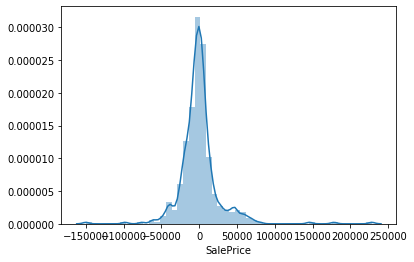

In [48]:
# Here we can see although r2 score has decreased, value of RMSE has been decreased(Which is good)
print('Training score : {}'.format(new_model.score(X_train,y_train)))
y_pred = new_model.predict(X_test)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

------------------------------------------------Cross Validate Model-----------------------------------------------------------

In [49]:
# An we know accuracy of model vary each time random state changes
# So, we will cross validate it
from sklearn.model_selection import cross_val_score
model = KNeighborsRegressor()
score = cross_val_score(model , x , y , cv = 10)

In [50]:
print(score)

[0.69427638 0.6451977  0.7085948  0.70893663 0.62178994 0.71660001
 0.70643175 0.69506349 0.49877341 0.65561867]


In [51]:
# by 10 cross validation it has accuracy of 66%
# This is real accuracy of model
print(score.mean())

0.6651282772237616


---------------------------------------------------Ridge Regression------------------------------------------------------------

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge()
param = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(model,param,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train , y_train)

C:\Users\Tirth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-1568643410.82307


Training score : -1168073176.1195447
r2 score: 0.7892311543267101
RMSE: 34836.84536518167


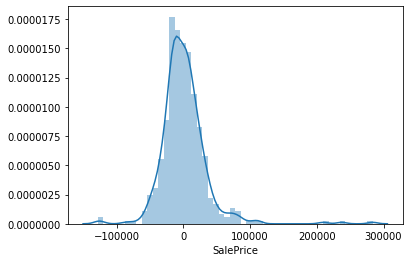

In [58]:
# compared to linear regression error has been reduced
print('Training score : {}'.format(ridge_regressor.score(X_train,y_train)))
y_pred = ridge_regressor.predict(X_test)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

--------------------------------------------------Lasso Regression-------------------------------------------------------------

In [60]:
from sklearn.linear_model import Lasso
model = Lasso()
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(model,param,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train , y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [61]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-1568785073.1854107


Training score : -1167879054.720386
r2 score: 0.7892311543267101
RMSE: 34870.12796019297


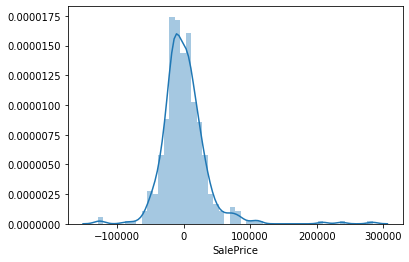

In [62]:
print('Training score : {}'.format(lasso_regressor.score(X_train,y_train)))
y_pred = lasso_regressor.predict(X_test)
print('r2 score: {}'.format(r2_score))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)